In [1]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from ast import literal_eval

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

name2index = {emotion: num for num, emotion in {0:"angry", 1:"sad", 2:"neutral", 3:"positive"}.items()}
num2emotion = {0: 'neutral', 1: 'angry', 2: 'positive', 3: 'sad', 4: 'other'}
emotion2num = {emotion: num for num, emotion in num2emotion.items()}

In [2]:
DATASET_PATH = r'D:\python-datasets\dusha'
DATASETS = ['podcast_train', 'podcast_test', 'crowd_train', 'crowd_test']

In [3]:
ds_index = -1
dataset = os.path.join(DATASET_PATH, DATASETS[ds_index])
dataset_info = os.path.join(dataset, f'raw_{DATASETS[ds_index]}.tsv')
df = pd.read_csv(dataset_info, sep='\t')

In [4]:
df.head(7)

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
0,9e9961c53ca6eeb440b217e539fbf46c,wavs/9e9961c53ca6eeb440b217e539fbf46c.wav,5.82,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f
1,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f
2,d49a6b560155831725a7bdc7d0a96099,wavs/d49a6b560155831725a7bdc7d0a96099.wav,4.38,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8
3,c6852b0925797612d7b6724da8cbe7b4,wavs/c6852b0925797612d7b6724da8cbe7b4.wav,8.58,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13
4,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,a5562e26cd8f1949488a2d1e1e549d97,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f
5,9e9961c53ca6eeb440b217e539fbf46c,wavs/9e9961c53ca6eeb440b217e539fbf46c.wav,5.82,neutral,NaN,a5562e26cd8f1949488a2d1e1e549d97,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f
6,d49a6b560155831725a7bdc7d0a96099,wavs/d49a6b560155831725a7bdc7d0a96099.wav,4.38,neutral,NaN,a5562e26cd8f1949488a2d1e1e549d97,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8


#### Видно, что в некоторых записях эмоции в аннотации и спикера не совпадают, будем избавимся от таких записей

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79088 entries, 0 to 79087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hash_id        79088 non-null  object 
 1   audio_path     79088 non-null  object 
 2   duration       79088 non-null  float64
 3   annotator_emo  79088 non-null  object 
 4   golden_emo     6998 non-null   float64
 5   annotator_id   79088 non-null  object 
 6   speaker_text   77833 non-null  object 
 7   speaker_emo    77833 non-null  object 
 8   source_id      77833 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.4+ MB


In [6]:
for ds_path in DATASETS:
    file_list = glob(os.path.join(DATASET_PATH, ds_path, '*.tsv'))
    for file in file_list:
        df = pd.read_csv(file, sep='\t')
        print(f'Файл: {os.path.basename(file)}')
        print(df[['annotator_emo', 'speaker_emo']].info())
        print(df.duration.describe(), '\n')

Файл: raw_podcast_train.tsv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645813 entries, 0 to 645812
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   annotator_emo  645813 non-null  object 
 1   speaker_emo    0 non-null       float64
dtypes: float64(1), object(1)
memory usage: 9.9+ MB
None
count    645813.000000
mean          3.253059
std           0.994352
min           1.099875
25%           2.500000
50%           3.200000
75%           4.000000
max           9.260000
Name: duration, dtype: float64 

Файл: raw_podcast_test.tsv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83447 entries, 0 to 83446
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   annotator_emo  83447 non-null  object 
 1   speaker_emo    0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB
None
count    83447.000000
mean         3.193

### В домене *podcast* не заполнено поле *speaker_emo*

### В домене *crowd* есть пропуски в поле *speaker_emo*

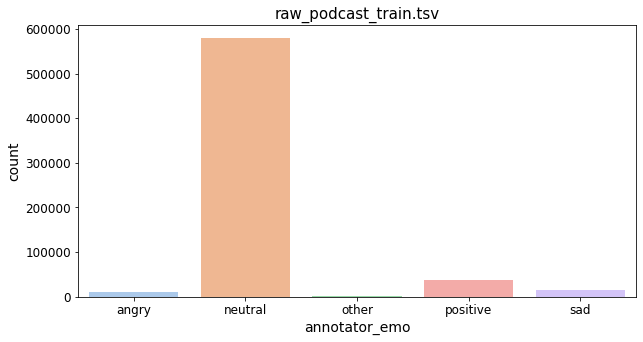

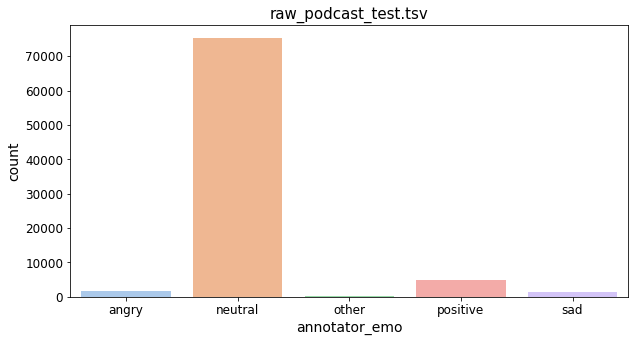

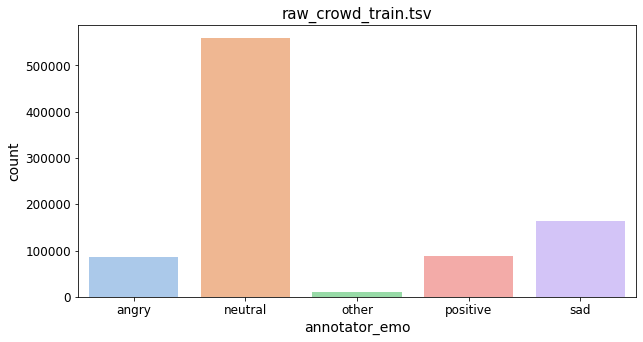

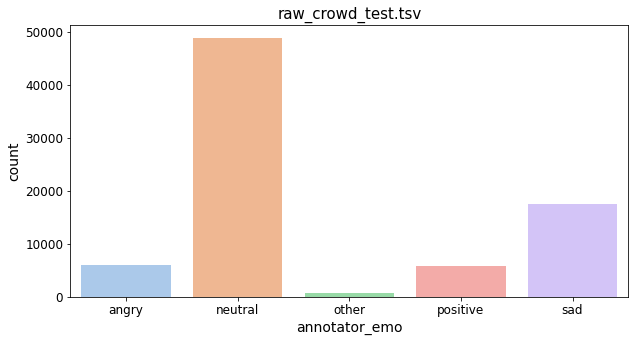

In [7]:
# Распределение по эмоциям в доменах podcast и crowd в тренировочной и тестовой выборках

sns.set_palette("pastel")
for ds_path in DATASETS:
    file_list = glob(os.path.join(DATASET_PATH, ds_path, '*.tsv'))
    for file in file_list:
        df = pd.read_csv(file, sep='\t')
        df.sort_values(by='annotator_emo', inplace=True)
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.title(file.split('\\')[-1])
        sns.countplot(df.annotator_emo)
        plt.show()

In [8]:
for ds_path in DATASETS:
    file_list = glob(os.path.join(DATASET_PATH, ds_path, '*.tsv'))
    for file in file_list:
        df = pd.read_csv(file, sep='\t')
        print(f'Файл: {os.path.basename(file).strip()}')
        print(df["annotator_emo"].value_counts(normalize=True))

Файл: raw_podcast_train.tsv
neutral     0.897605
positive    0.057859
sad         0.023381
angry       0.018093
other       0.003061
Name: annotator_emo, dtype: float64
Файл: raw_podcast_test.tsv
neutral     0.902789
positive    0.057294
angry       0.020396
sad         0.016034
other       0.003487
Name: annotator_emo, dtype: float64
Файл: raw_crowd_train.tsv
neutral     0.616902
sad         0.181565
positive    0.096210
angry       0.094301
other       0.011022
Name: annotator_emo, dtype: float64
Файл: raw_crowd_test.tsv
neutral     0.618514
sad         0.222575
angry       0.075700
positive    0.073020
other       0.010191
Name: annotator_emo, dtype: float64


### В трейне и тесте примерное одинаковое соотношение записей по количеству эмоций

Файл: raw_crowd_train.tsv  	Кол-во строк: 906953 Кол-во несовпадающих эмоций:  302594


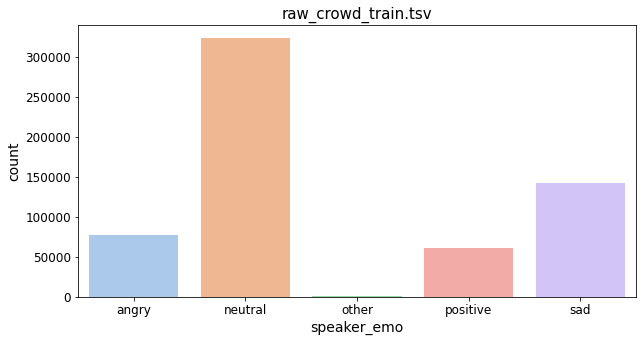

Файл: raw_crowd_test.tsv  	Кол-во строк:  79088 Кол-во несовпадающих эмоций:  24831


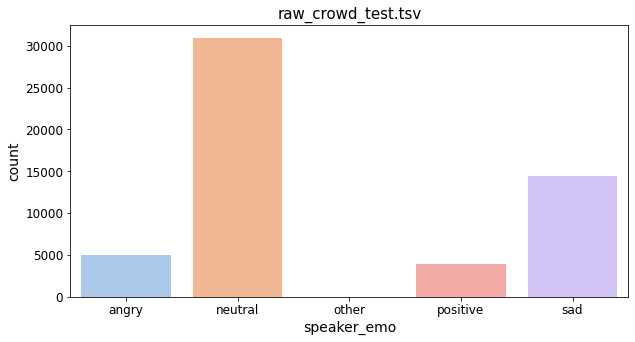

In [9]:
# После удаления несоответствий эмоций в аннотации и спикера

sns.set_palette("pastel")
for ds_path in DATASETS[2:]:
    file_list = glob(os.path.join(DATASET_PATH, ds_path, '*.tsv'))
    for file in file_list:
        df = pd.read_csv(file, sep='\t')
        df["speaker_emo"].fillna(df["annotator_emo"], inplace=True)
        print(f'Файл: {os.path.basename(file).strip()} ', 
              f'\tКол-во строк: {len(df):6}', 
              'Кол-во несовпадающих эмоций: ', sum(df["speaker_emo"] != df["annotator_emo"]))
        df = df[df["speaker_emo"] == df["annotator_emo"]]
        df.sort_values(by='speaker_emo', inplace=True)
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.title(file.split('\\')[-1])
        sns.countplot(df.speaker_emo)
        plt.show()

In [10]:
for ds_path in DATASETS[2:]:
    file_list = glob(os.path.join(DATASET_PATH, ds_path, '*.tsv'))
    for file in file_list:
        df = pd.read_csv(file, sep='\t')
        df["speaker_emo"].fillna(df["annotator_emo"], inplace=True)
        print(f'Файл: {os.path.basename(file).strip()}')
        df = df[df["speaker_emo"] == df["annotator_emo"]]
        print(df["annotator_emo"].value_counts(normalize=True))

Файл: raw_crowd_train.tsv
neutral     0.535397
sad         0.236030
angry       0.128452
positive    0.099686
other       0.000435
Name: annotator_emo, dtype: float64
Файл: raw_crowd_test.tsv
neutral     0.570341
sad         0.264851
angry       0.092007
positive    0.072746
other       0.000055
Name: annotator_emo, dtype: float64
